**CII4Q3 Visi Komputer**

---



#Exercise 5a: Klasifikasi Fruits

---

- Ichwan Rizky Wahyudin(1301213434)

- Abdul Wasiul Khair(1301213278)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [46]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, class_names):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=25,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.25,
        horizontal_flip=True
    )

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        target_size=(250, 250),
        batch_size=24,
        class_mode='categorical',
        classes=class_names
    )

    validation_datagen = ImageDataGenerator(
        rescale = 1./255
        )

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        target_size=(250, 250),
        batch_size=24,
        class_mode='categorical',
        classes=class_names
    )
    return train_generator, validation_generator

class_names = os.listdir('dataset/train')
TRAINING_DIR = './dataset/train'
VALIDATION_DIR = './dataset/test'
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, class_names)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


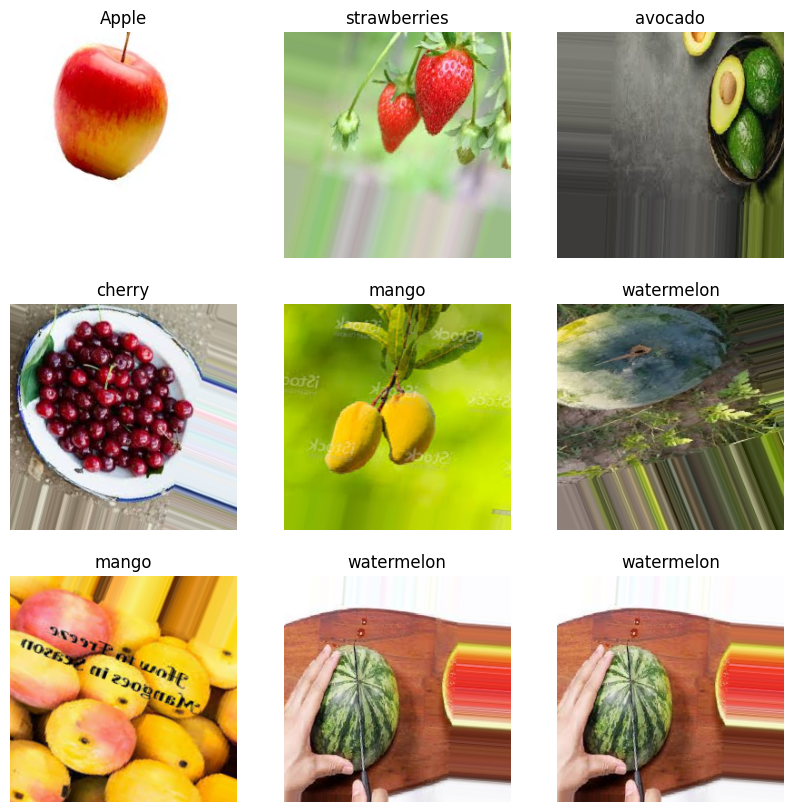

In [47]:
import matplotlib.pyplot as plt
import random

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    num_images = min(len(images), len(labels))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        idx = random.randint(0, num_images - 1)
        plt.imshow(images[idx])
        plt.title(class_names[np.argmax(labels[idx])])
        plt.axis("off")
    plt.show()

images, labels = next(train_generator)
plot_images(images, labels, class_names)


In [48]:
def count_data(directory):
    count = {}
    for class_name in class_names:
        count[class_name] = len(os.listdir(os.path.join(directory, class_name)))
    return count

train_count = count_data(TRAINING_DIR)
validation_count = count_data(VALIDATION_DIR)
print(train_count)
print(validation_count)

{'Apple': 230, 'avocado': 230, 'Banana': 230, 'cherry': 230, 'kiwi': 230, 'mango': 231, 'orange': 230, 'pinenapple': 230, 'strawberries': 230, 'watermelon': 230}
{'Apple': 89, 'avocado': 105, 'Banana': 106, 'cherry': 105, 'kiwi': 105, 'mango': 105, 'orange': 97, 'pinenapple': 105, 'strawberries': 103, 'watermelon': 105}


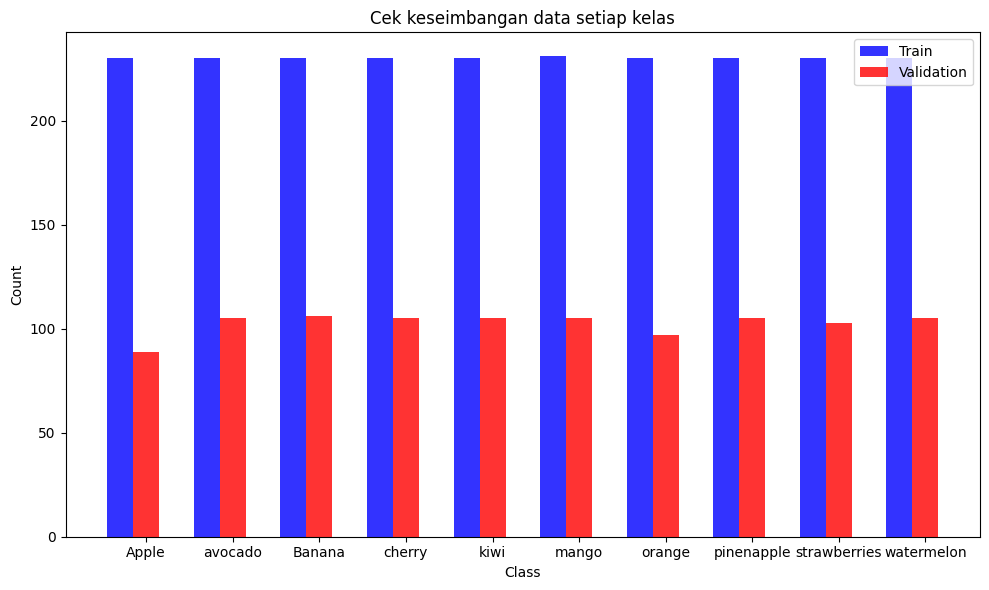

In [49]:
def plot_data_distribution(train_count, validation_count):
    fig, ax = plt.subplots()
    bar_width = 0.3
    opacity = 0.8
    index = np.arange(len(class_names))
    train_counts = [train_count[class_name] for class_name in class_names]
    validation_counts = [validation_count[class_name] for class_name in class_names]
    train_bar = plt.bar(index, train_counts, bar_width, alpha=opacity, color='b', label='Train')
    validation_bar = plt.bar(index + bar_width, validation_counts, bar_width, alpha=opacity, color='r', label='Validation')
    fig.set_size_inches(10, 6)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Cek keseimbangan data setiap kelas')
    plt.xticks(index + bar_width, class_names)
    plt.legend()
    plt.tight_layout()
    
plot_data_distribution(train_count, validation_count)

In [58]:
pretrained_model = tf.keras.applications.VGG16(input_shape=(250, 250, 3),
                                                include_top=False,
                                                weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
    
model = tf.keras.models.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
history = model.fit(train_generator,
                            batch_size=24,
                              epochs=15,
                              validation_data=validation_generator)

Epoch 1/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2484 - loss: 2.7316

c:\Users\abdul wasiul khair\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 371s 4s/step - accuracy: 0.2491 - loss: 2.7277 - val_accuracy: 0.4302 - val_loss: 2.3745
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.4770 - loss: 1.7223 - val_accuracy: 0.6722 - val_loss: 1.0737
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.5568 - loss: 1.4502 - val_accuracy: 0.7093 - val_loss: 0.9059
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.5921 - loss: 1.2486 - val_accuracy: 0.7385 - val_loss: 0.7770
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.6253 - loss: 1.1727 - val_accuracy: 0.7541 - val_loss: 0.7432
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.6352 - loss: 1.0769 - val_accuracy: 0.7473 - val_loss: 0.7480
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.6551 - loss: 1.0978 - val_accuracy: 0.7737 - val_loss: 0.7033
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.6892 - loss: 0.9527 - val_accuracy: 0.7912 - val_loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

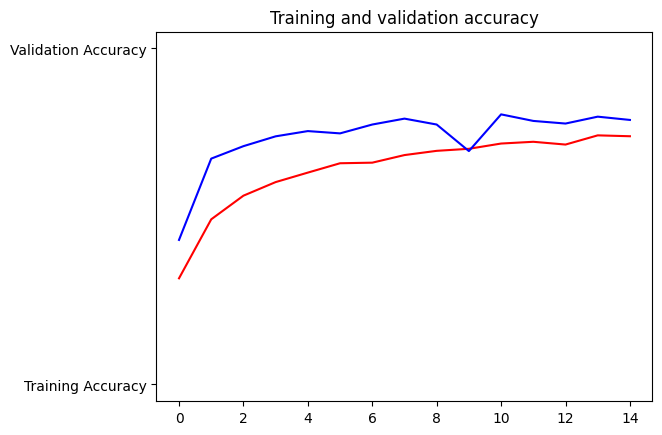

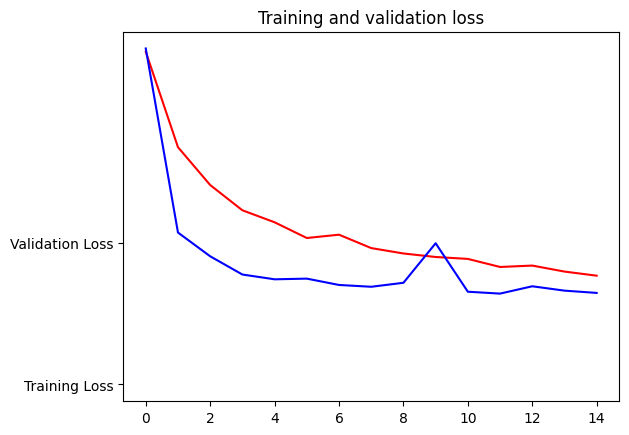

In [61]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


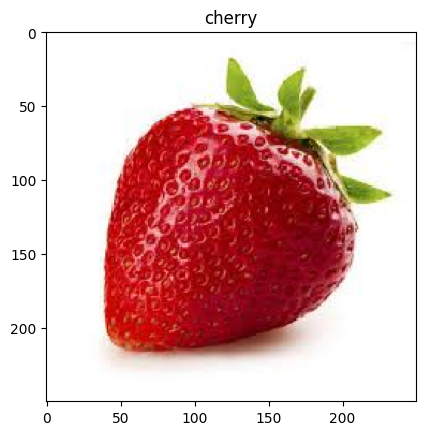

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [63]:
import os
import numpy as np
from keras.preprocessing import image

path = './dataset/predict'
img = 'f2.jpeg'
img_path = os.path.join(path, img)
img = image.load_img(img_path, target_size=(250, 250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

plt.imshow(img)
plt.title(class_names[np.argmax(classes[0])])
plt.show()
print(classes)
    
